In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ruta = '..\\data\\processed\\HR_cleaned.csv'
df_hr = pd.read_csv(ruta)

### Distribución de la variable 'satisfaction_level'

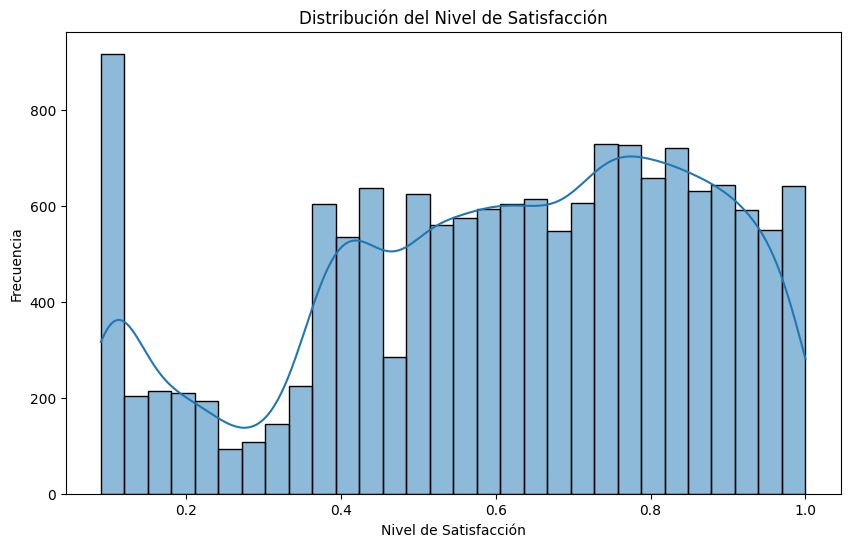

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(df_hr['satisfaction_level'], kde=True, bins=30)
plt.title('Distribución del Nivel de Satisfacción')
plt.xlabel('Nivel de Satisfacción')
plt.ylabel('Frecuencia')
plt.show()


### Distribución de la variable 'salary'

In [4]:
df_hr['salary'].value_counts()

salary
low       7316
medium    6446
high      1237
nme          1
Name: count, dtype: int64

In [5]:
df_hr[df_hr['salary'] == 'nme']

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
14999,0.7,0.4,2,158,2,0,1,0,sale,nme


In [6]:
df_hr=df_hr[df_hr['salary'] != 'nme']

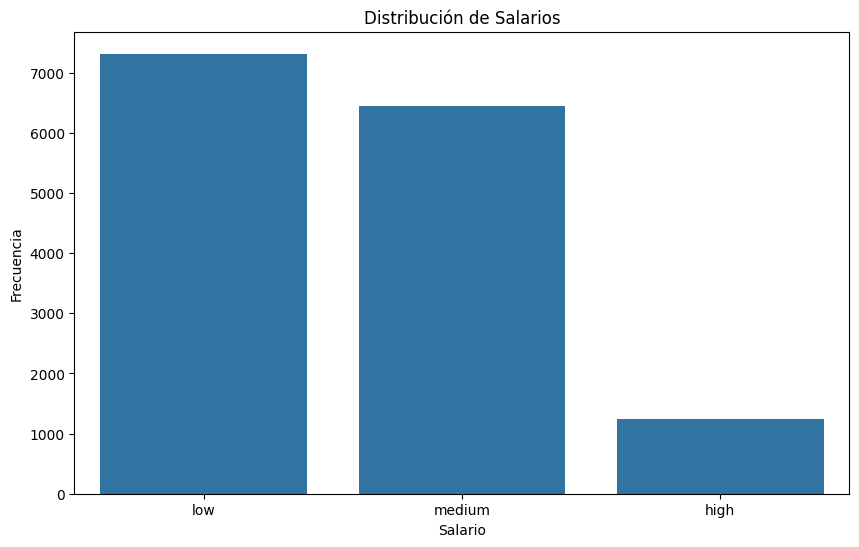

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_hr, x='salary')
plt.title('Distribución de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')
plt.show()

### Relación entre 'satisfaction_level' y 'left' (satisfaccion y abandono)

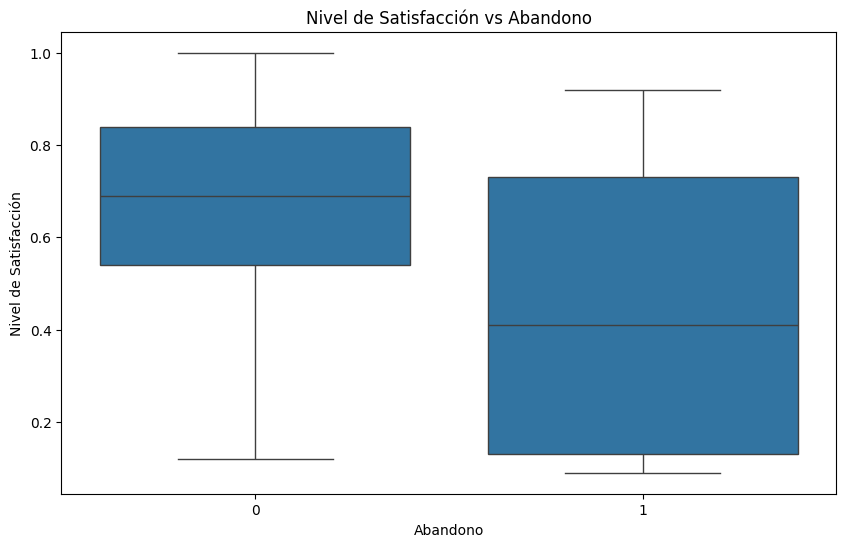

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='left', y='satisfaction_level', data=df_hr)
plt.title('Nivel de Satisfacción vs Abandono')
plt.xlabel('Abandono')
plt.ylabel('Nivel de Satisfacción')
plt.show()


### Relación entre 'average_monthly_hours' y 'left'

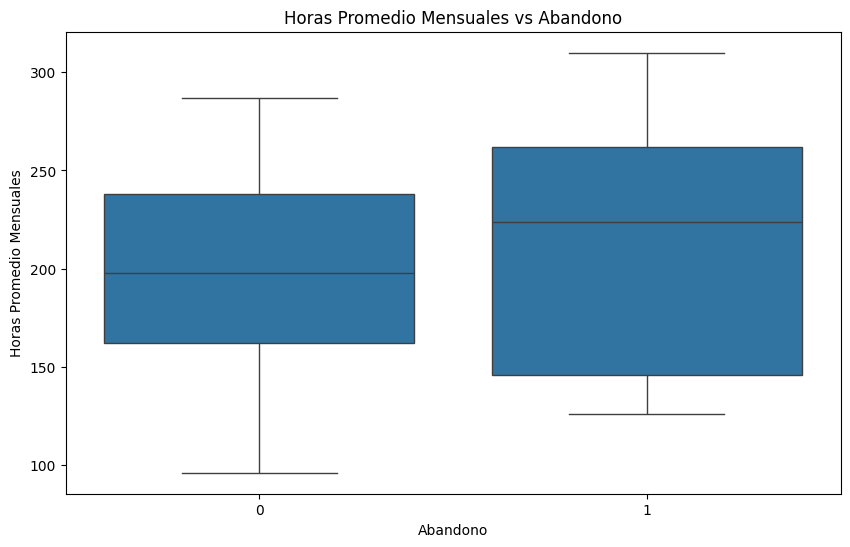

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='left', y='average_monthly_hours', data=df_hr)
plt.title('Horas Promedio Mensuales vs Abandono')
plt.xlabel('Abandono')
plt.ylabel('Horas Promedio Mensuales')
plt.show()


### Matriz de correlación

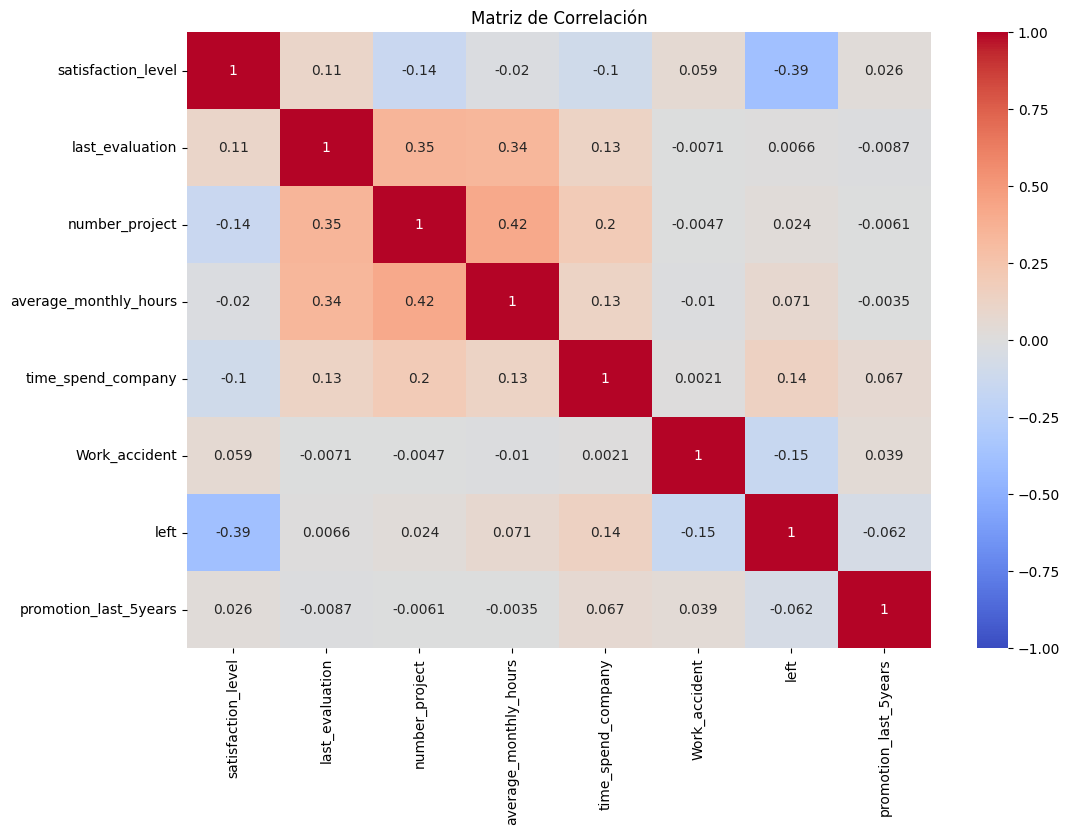

In [10]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_hr[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


### Pares de variables con hue='left'

In [11]:
# sns.pairplot(df_hr, hue='left', palette='Set1')
# plt.suptitle('Diagrama de Pares de Variables')
# plt.show()

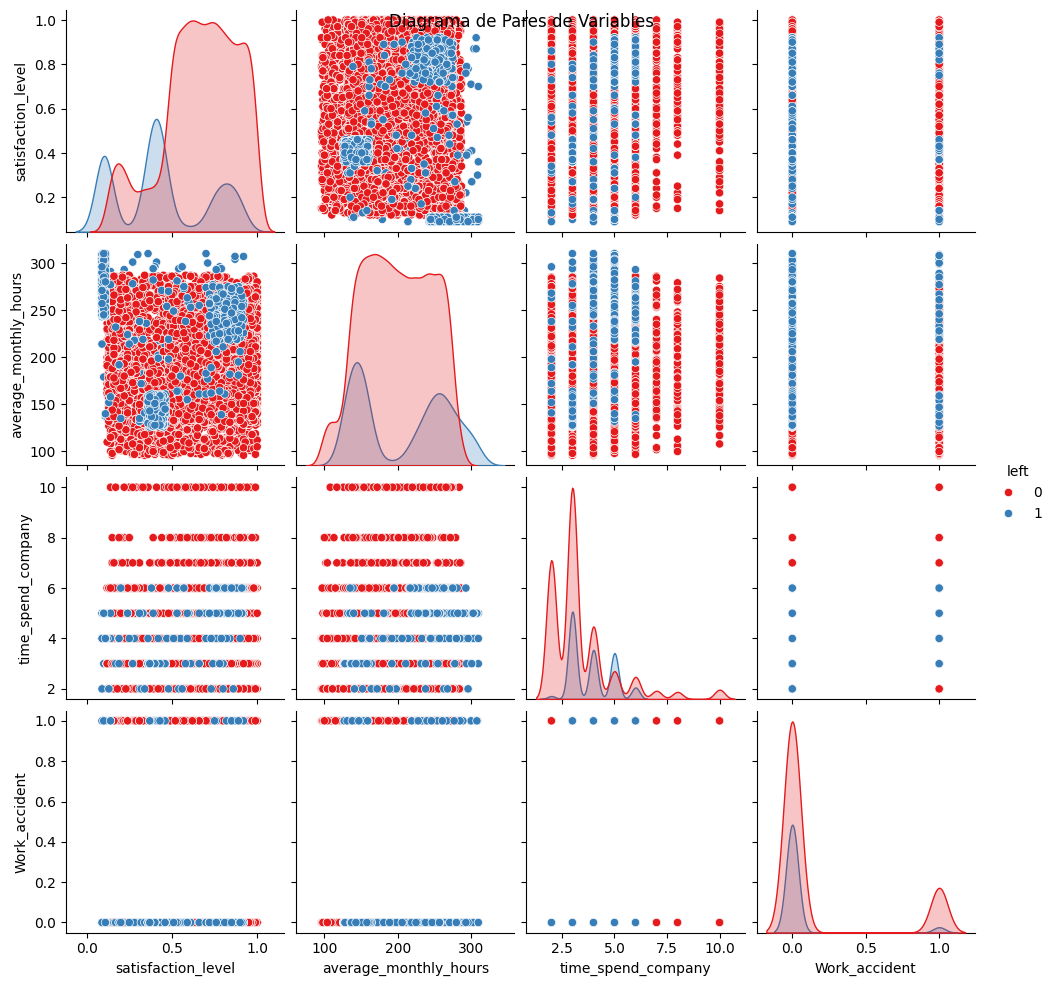

In [12]:
sns.pairplot(df_hr[['satisfaction_level', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left']], hue='left', palette='Set1')
plt.suptitle('Diagrama de Pares de Variables')
plt.show()

### Distribución de 'department' y 'left'

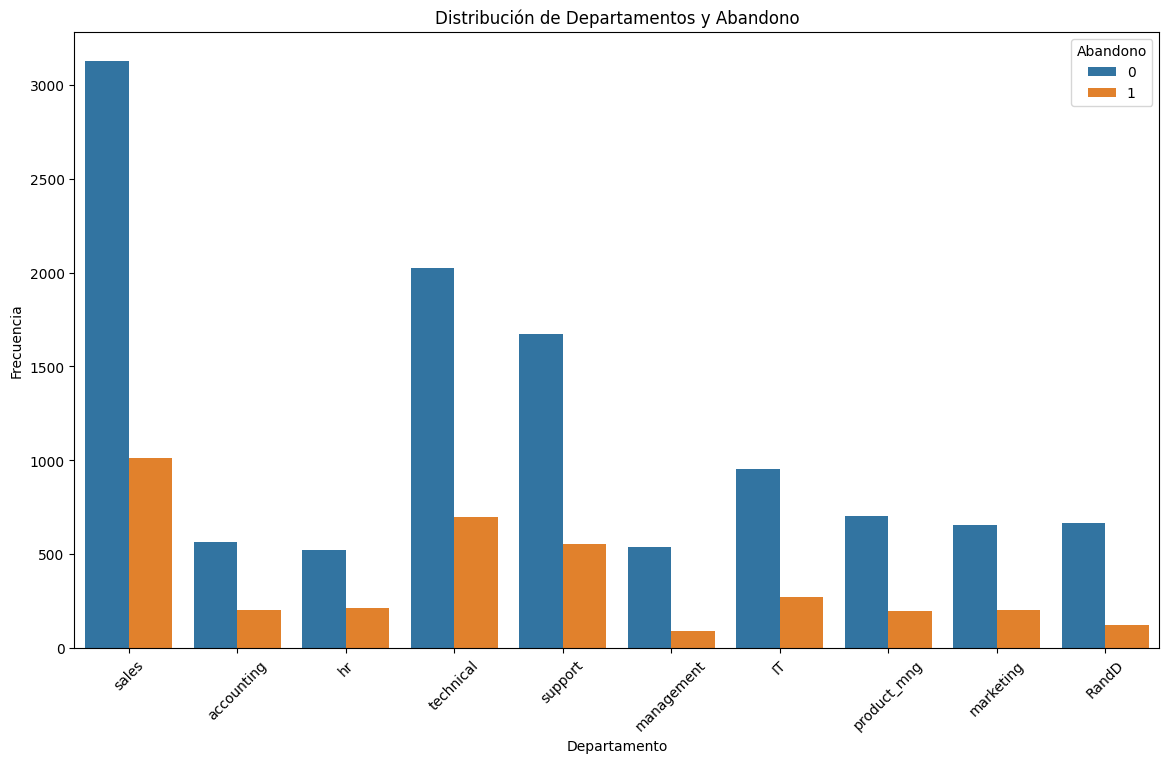

In [13]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_hr, x='department', hue='left')
plt.title('Distribución de Departamentos y Abandono')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.legend(title='Abandono', loc='upper right')
plt.xticks(rotation=45)
plt.show()

### Número de empleados por departamento

C:\Users\Casa\AppData\Local\Temp\ipykernel_13308\463048875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_hr, x='department', palette='viridis')


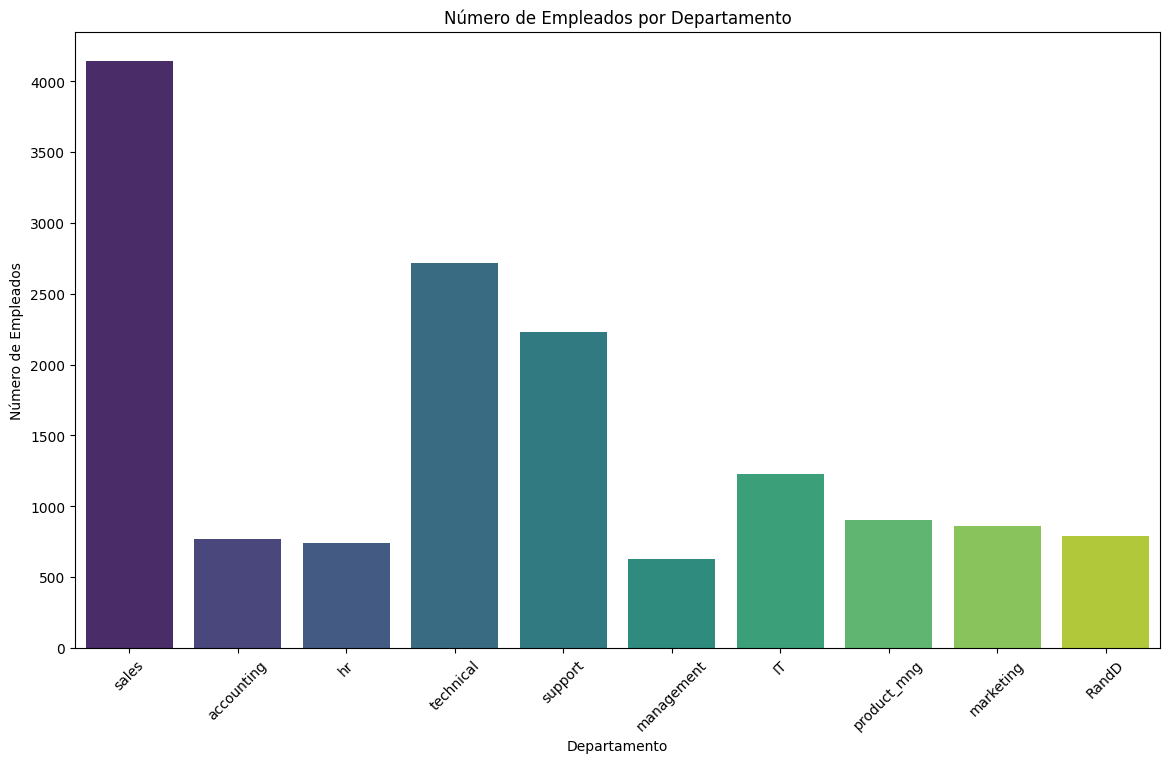

In [14]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df_hr, x='department', palette='viridis')
plt.title('Número de Empleados por Departamento')
plt.xlabel('Departamento')
plt.ylabel('Número de Empleados')
plt.xticks(rotation=45)
plt.show()


In [15]:
df_hr['department'].value_counts()

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64

### Evolución del nivel de satisfacción con el tiempo en la compañía


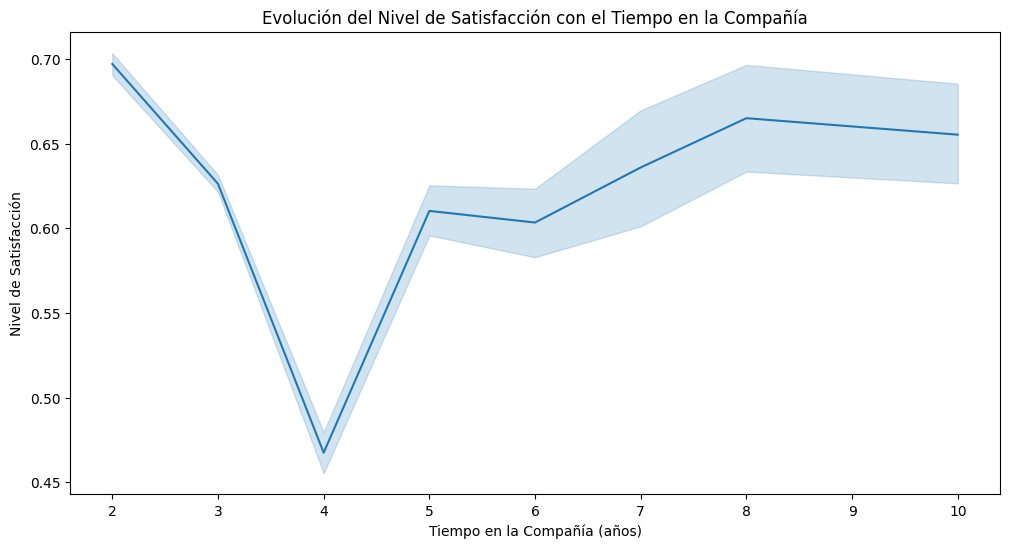

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='time_spend_company', y='satisfaction_level', data=df_hr)
plt.title('Evolución del Nivel de Satisfacción con el Tiempo en la Compañía')
plt.xlabel('Tiempo en la Compañía (años)')
plt.ylabel('Nivel de Satisfacción')
plt.show()


### Heatmap de interacciones entre 'department' y 'salary' con respecto al abandono

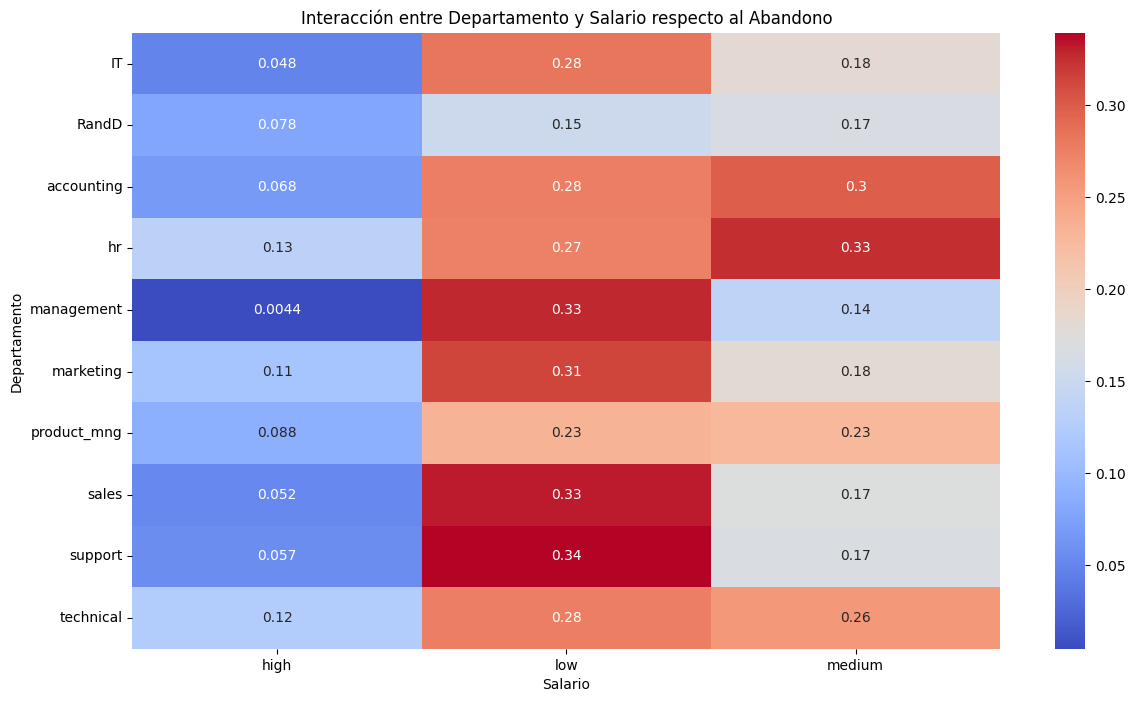

In [17]:
plt.figure(figsize=(14, 8))
department_salary_left = df_hr.pivot_table(index='department', columns='salary', values='left', aggfunc='mean')
sns.heatmap(department_salary_left, annot=True, cmap='coolwarm')
plt.title('Interacción entre Departamento y Salario respecto al Abandono')
plt.xlabel('Salario')
plt.ylabel('Departamento')
plt.show()


### otros

In [18]:
df_hr['promotion_last_5years'].value_counts()

promotion_last_5years
0    14680
1      319
Name: count, dtype: int64

In [19]:
df_hr['promotion_last_5years'].value_counts(normalize=True)



promotion_last_5years
0    0.978732
1    0.021268
Name: proportion, dtype: float64

In [20]:
df_hr['Work_accident'].value_counts()

Work_accident
0    12830
1     2169
Name: count, dtype: int64

In [21]:
df_hr['Work_accident'].value_counts(normalize=True)


Work_accident
0    0.85539
1    0.14461
Name: proportion, dtype: float64